# SUPERVISED
# REGRESSION
# LINEARREGRESSION ALGORITHM
>DATA TRANFORMATION

>IN THIS DATA SCALLING


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


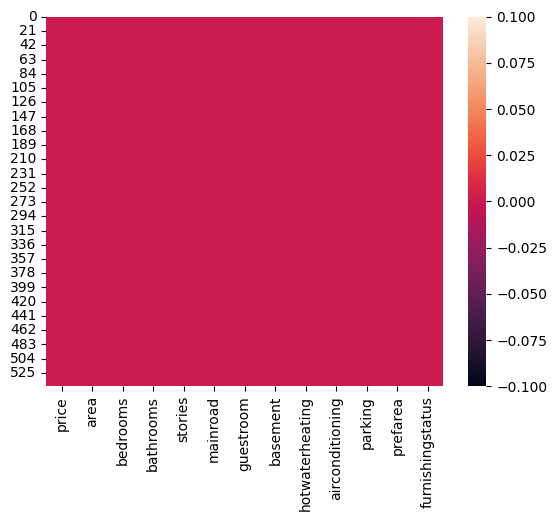

In [3]:
sns.heatmap(df.isnull())
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**now i observe that our 7 columns mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus are not numerical so convert first these into categorical as:**

In [5]:
obj_var = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for columns in obj_var:
  df[columns] = df[columns].astype('category')

**now our object data columns are converted into category datatypes**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


**now convert these category data columns in int type data as**

In [7]:
mainroar_var = pd.get_dummies(df['mainroad'], drop_first = True, dtype = int)
guestroom_var = pd.get_dummies(df['guestroom'], drop_first = True, dtype = int)
hotwaterheating_var = pd.get_dummies(df['hotwaterheating'], drop_first = True, dtype = int)
airconditioning_var = pd.get_dummies(df['airconditioning'], drop_first = True, dtype = int)
prefarea_var = pd.get_dummies(df['prefarea'], drop_first = True, dtype = int)
furnishingstatus_var = pd.get_dummies(df['furnishingstatus'], drop_first = True, dtype = int)

In [8]:
print(mainroar_var.head())
print(guestroom_var.head())
print(hotwaterheating_var.head())
print(airconditioning_var.head())
print(prefarea_var.head())
print(furnishingstatus_var.head())

   yes
0    1
1    1
2    1
3    1
4    1
   yes
0    0
1    0
2    0
3    0
4    1
   yes
0    0
1    0
2    0
3    0
4    0
   yes
0    1
1    1
2    0
3    1
4    1
   yes
0    1
1    0
2    1
3    1
4    0
   semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0


**now we can see out data is converted in to 0 and 1's foam now put thsese new columns in data set and remove older columns as**

In [9]:
# input new columns in dataset
df = pd.concat([df,mainroar_var,guestroom_var,hotwaterheating_var,airconditioning_var,prefarea_var,furnishingstatus_var], axis = 1)

now remove older columns as :

In [10]:
df.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis = 1, inplace = True)

now we can see out all data is in int from ready to give to the model

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           545 non-null    int64
 1   area            545 non-null    int64
 2   bedrooms        545 non-null    int64
 3   bathrooms       545 non-null    int64
 4   stories         545 non-null    int64
 5   parking         545 non-null    int64
 6   yes             545 non-null    int64
 7   yes             545 non-null    int64
 8   yes             545 non-null    int64
 9   yes             545 non-null    int64
 10  yes             545 non-null    int64
 11  semi-furnished  545 non-null    int64
 12  unfurnished     545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,0,0,0


# splitting data

In [12]:
x = df.drop('price', axis = 1)
y = df['price']

# NOW SCALLING DATA OF X AND Y BEFORE CONVERTER IT INTO X_TRAIN,Y_TRAIN,X_TEST,Y_TEST

In [13]:
# first import preprocessing from sklearn
from sklearn import preprocessing

# TRANFORM OUR X DATA AS:
x_preprocessing_var = preprocessing.StandardScaler().fit(x)
x_tranform = x_preprocessing_var.fit_transform(x)
x_tranform.shape
x_tranform

# TRANFORM OUR Y DATA AS :
# Reshape y to a 2D array with a single column
y_2d = y.values.reshape(-1, 1)
y_preprocessing_var = preprocessing.StandardScaler().fit(y_2d)
y_tranform = y_preprocessing_var.transform(y_2d) # Use y_preprocessing_var for y transform
y_tranform.shape
y_tranform

array([[ 4.56636513e+00],
       [ 4.00448405e+00],
       [ 4.00448405e+00],
       [ 3.98575468e+00],
       [ 3.55497918e+00],
       [ 3.25530927e+00],
       [ 2.88072189e+00],
       [ 2.88072189e+00],
       [ 2.73088693e+00],
       [ 2.69342819e+00],
       [ 2.69342819e+00],
       [ 2.62974834e+00],
       [ 2.43121702e+00],
       [ 2.39375829e+00],
       [ 2.39375829e+00],
       [ 2.31884081e+00],
       [ 2.31884081e+00],
       [ 2.24392333e+00],
       [ 2.20646459e+00],
       [ 2.18773522e+00],
       [ 2.13154711e+00],
       [ 2.09408838e+00],
       [ 2.07535901e+00],
       [ 2.07535901e+00],
       [ 2.03790027e+00],
       [ 2.01917090e+00],
       [ 1.97796629e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.88806531e+00],
       [ 1.83187721e+00],
       [ 1.79441847e+00],
       [ 1.77351649e+00],
       [ 1.75321385e+00],
       [ 1.71950099e+00],
       [ 1.7

now split data using x_tranform and y_tranform

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tranform,y_tranform,test_size = 0.2, random_state = 20)

NOW TRAIN THE MODEL USING X_TRAIN AND Y_TRAIN AS :

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# model testing

In [16]:
y_pred = lr.predict(x_test)
print(y_pred.shape)
print(y_pred)

(109, 1)
[[ 1.02464259]
 [ 0.20852985]
 [ 1.47411764]
 [-1.0017629 ]
 [ 1.29279688]
 [-0.52217897]
 [ 1.29536141]
 [-0.03423602]
 [-0.04147813]
 [ 1.23071857]
 [ 0.91650112]
 [ 1.16815454]
 [ 1.36040027]
 [-0.62235929]
 [ 1.25873769]
 [ 1.16476159]
 [ 0.1036437 ]
 [-0.93291612]
 [-0.73806543]
 [-0.01269295]
 [ 0.18809181]
 [ 0.67451944]
 [-0.8271931 ]
 [ 0.27463309]
 [-1.12698412]
 [-0.01145397]
 [-0.8732169 ]
 [-0.42737024]
 [-1.03886895]
 [-1.18593706]
 [-0.86370183]
 [-0.50313382]
 [ 0.46403394]
 [ 0.22238125]
 [-0.3482169 ]
 [-0.78358018]
 [-0.25575791]
 [ 1.23103898]
 [ 0.96906392]
 [-0.13609175]
 [-0.36772469]
 [-0.29256281]
 [-1.17537833]
 [ 0.03084058]
 [ 0.12460652]
 [ 0.02620162]
 [ 1.25075206]
 [-1.31059756]
 [-0.5916506 ]
 [ 1.20041708]
 [-0.70493845]
 [-0.88752873]
 [ 0.86227161]
 [-0.44668144]
 [ 0.36690273]
 [ 0.67433771]
 [-0.57548112]
 [-1.26875134]
 [ 0.48523911]
 [ 0.1037453 ]
 [-0.86649672]
 [-1.34767884]
 [ 1.71978539]
 [ 0.87300893]
 [-0.19267689]
 [-0.91404437]
 

# scatter plot to see linear regression line as:

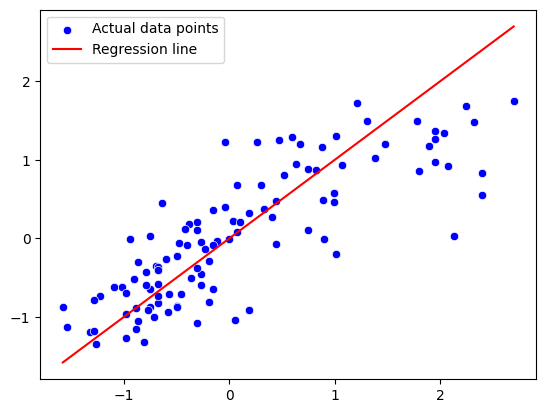

In [17]:
sns.scatterplot(x = y_test.ravel(), y = y_pred.ravel(), color = 'b', label = 'Actual data points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)] , color= 'r', label = 'Regression line')
plt.legend()
plt.show()

print actual values and predicted values

In [18]:
results = np.column_stack([y_test,y_pred])
print('Actual value   |   Predicted value')
for actual,predicted in results:
  print(actual, "-----", predicted)

Actual value   |   Predicted value
1.378626468040712 ----- 1.0246425937141759
-0.30327089666538287 ----- 0.20852984636164562
2.3188408077761906 ----- 1.4741176433616978
-0.7153170216490587 ----- -1.001762895515253
0.5919929567082401 ----- 1.292796883159308
-0.9026107148234568 ----- -0.5221789688661445
1.007784955555404 ----- 1.295361405467881
-0.11972307735447271 ----- -0.03423601573733475
-0.26581215803050323 ----- -0.04147812894435287
0.25861018285781145 ----- 1.2307185695063954
2.075359006649473 ----- 0.9165011157025478
1.8880653134750751 ----- 1.1681545353107006
1.9442534214273945 ----- 1.3604002675605764
-1.0149869307280956 ----- -0.6223592942179601
1.9442534214273945 ----- 1.2587376901136724
0.8766793703333252 ----- 1.1647615944964556
0.7455737851112465 ----- 0.10364370199461444
-0.58421143642698 ----- -0.9329161173491471
-1.2210099932199336 ----- -0.7380654328892149
-0.9400694534583365 ----- -0.012692952229336493
-0.3781883739351421 ----- 0.18809180863347255
0.2960689214926911 -

# RESIDUAL ANALYSIS

[-0.92335911 -0.10724637 -1.37283416  1.10304638 -1.1915134   0.62346245
 -1.19407792  0.1355195   0.14276161 -1.12943509 -0.81521764 -1.06687105
 -1.25911679  0.72364277 -1.15745421 -1.06347811 -0.00236022  1.0341996
  0.83934891  0.11397643 -0.08680833 -0.57323596  0.92847658 -0.17334961
  1.2282676   0.11273745  0.97450038  0.52865372  1.14015243  1.28722054
  0.96498531  0.6044173  -0.36275046 -0.12109776  0.44950038  0.88486366
  0.3570414  -1.1297555  -0.86778044  0.23737523  0.46900817  0.39384629
  1.27666181  0.0704429  -0.02332304  0.07508186 -1.14946858  1.41188104
  0.69293408 -1.0991336   0.80622193  0.98881221 -0.76098813  0.54796492
 -0.26561925 -0.57305423  0.6767646   1.37003482 -0.38395563 -0.00246182
  0.9677802   1.44896232 -1.61850191 -0.77172545  0.29396037  1.01532785
  0.40685695 -0.70650436  1.24699679 -1.3853503   0.82921084 -0.78557327
 -1.64303102 -0.22658697  0.02255247 -0.83159988  0.97133311  0.18746173
 -1.39586594  1.18051231  0.74806956 -1.5844148  -0.

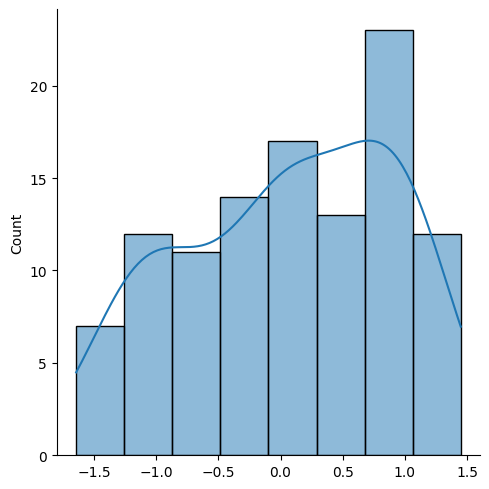

In [19]:
# difference between actual and predicted value
residual_var = actual-y_pred.reshape(-1)
print(residual_var)

# displot of actual-lr_pred as
sns.displot(residual_var,kde = True)
plt.show()

MODEL EVALUATION

FIND MEAN SQUARE ERROR

FIND ROOT MEAN SQUARE ERROR

In [20]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print("MEAN SQUARE ERROR",lr_mse)
print("ROOT MEAN SQUARE ERROR",lr_rmse)

MEAN SQUARE ERROR 0.3518583344733722
ROOT MEAN SQUARE ERROR 0.5931764783547745


# now we can see out models mean square error after data transfromation is very low as complare to previous lecture 17 coding

# use this data to trained other regression models
> DECISION TREE REGRESSION

>RANDOM FOREST REGRESSSION

>GRADIENT BOOSTING REGRESSION



# DECISSION TREE REGRESSION

In [21]:
# here i import decission tree regression model and train with data
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

 NOW OUR MODEL IS TRAINED AND HERE PERFORM TESTING

In [22]:
dtr_y_pred = dtr.predict(x_test)
print(dtr_y_pred.shape)
print(dtr_y_pred)

(109,)
[ 0.18369271 -0.3032709   1.23253739 -1.24910405  0.18369271 -0.15343594
  1.00778496  2.20646459 -0.3032709   2.07535901  2.20646459 -0.08226434
  1.56966604 -0.34072964  0.44590388  1.38237234  1.38237234 -0.73404639
 -1.16482189 -0.04105973 -0.19464055  0.63319757 -0.58421144  0.14623397
 -0.96816351 -0.86515198  0.03385775 -0.76775926 -0.82769324 -1.16482189
 -0.56548207 -0.86515198  0.25486431  0.63319757 -0.1159772  -0.1159772
 -0.34072964  0.1275046   1.45728982 -0.32200027 -1.50195053 -0.07851846
 -1.16482189 -0.58421144  1.23253739 -0.90261071  0.3709864  -1.12736315
 -1.08990441  1.49474856  0.07131649 -0.26581216  0.91413811  0.25861018
  0.52082135 -0.67785828 -0.60668668 -0.94006945  0.70811505  0.38971577
 -0.71531702 -1.01498693  2.0191709   0.63319757  0.93286748 -0.97752819
 -0.3032709   0.76430315 -1.16482189  1.38237234 -1.05244567  0.25861018
  0.6294517   0.63319757 -0.359459    0.53955072 -1.23973936  0.3709864
  1.56966604 -1.0337163  -0.45310585  1.719500

HERE WE FIND THE MEAN SQUARE ERROR AND ROOT MEAN SQUARE ERROR OF DESSION TREE REGRESSION

In [29]:
from sklearn.metrics import mean_squared_error
dtr_mse = mean_squared_error(dtr_y_pred,y_test)
dtr_rmse = np.sqrt(dtr_mse)

In [30]:
print('mean square error of desisiontreeregression is ', dtr_mse)
print('root mean square error of desisiontreeregression is ', dtr_rmse)

mean square error of desisiontreeregression is  0.6691306433512032
root mean square error of desisiontreeregression is  0.8180040607180402


# RANDOM FOREST REGRESSION

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

NOW OUR MODEL IS TRAINED HERE WE PERFORM TESTING

In [33]:
rfr_y_pred = rfr.predict(x_test)
print(rfr_y_pred.shape)
print(rfr_y_pred)

(109,)
[ 0.62394526 -0.31226099  1.52123189 -1.01492807  0.45635486 -0.46966261
  1.12203411  0.10701467 -0.38697245  1.18612601  0.60735104  0.32611083
  1.93732355 -0.15137571  0.8240873   0.98302473  0.31974284 -0.65665664
 -0.9076177  -0.09326472  0.09941054  0.64218767 -0.73945918  0.27014747
 -0.91231877 -0.28508468 -0.78319288 -0.70859755 -0.96457059 -1.09514863
 -0.53356722 -0.4616839   0.89349834  0.57030435 -0.54448644 -0.35673201
 -0.04358819  0.50857235  0.60371754  0.20890244 -0.96936219 -0.20516646
 -1.21820059 -0.73872873  0.35315604  0.3394836   0.72736884 -1.02903396
 -0.59286441  1.32300024 -0.63232719 -0.65601984  1.2871335  -0.11045204
  0.15940071  0.36521775 -0.65422182 -0.96089651  0.39784431 -0.06181187
 -1.00251317 -1.05599176  2.62731352  1.31221212  0.14046532 -1.24348524
 -0.00391939  1.02192563 -1.23093656  1.28898771 -0.91939223  0.36712815
  0.64881786  0.58300286 -0.07741343  0.91428794 -1.2071128  -0.42113482
  1.60300431 -0.98436441 -0.75116503  1.7668

HERE WE FIND THE MEAN SQUARE ERROR AND ROOT MEAN SQUARE ERROR OF RANDOM FOREST

In [35]:
from sklearn.metrics import mean_squared_error
rfr_mse = mean_squared_error(rfr_y_pred, y_test)
rfr_rmse = np.sqrt(rfr_mse)

In [36]:
print('mean square error of random forest is ', rfr_mse)
print('root mean square error of random forest is ',rfr_rmse)

mean square error of random forest is  0.41920660242202756
root mean square error of random forest is  0.6474616609669082


# GRADIENT BOOSTING REGRESSION

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

NOW OUR MODEL IS TRAINED NOW HERE PERFORM TESTING

In [38]:
gbr_y_pred = gbr.predict(x_test)
print(gbr_y_pred.shape)
print(gbr_y_pred)

(109,)
[ 0.66005061 -0.29828972  1.61582519 -0.85164982  0.75811786 -0.4751562
  1.36924987 -0.03611038 -0.36909917  1.68198487  0.70096147  0.92666876
  2.1265588  -0.29561301  1.11228092  1.12257923  0.33238142 -0.72447594
 -0.74146197 -0.48382616  0.14133053  0.86937587 -0.89250963  0.07030237
 -0.95622071 -0.39901017 -0.79064632 -0.61625609 -0.9045811  -1.12486262
 -0.6009954  -0.52948723  0.74530602  0.49412792 -0.44875533 -0.66877095
  0.09274981  0.7220368   0.63864032  0.28171559 -0.44187699 -0.15516803
 -1.12486262 -0.37452237  0.03345741 -0.047242    1.18879004 -1.09058521
 -0.59357315  1.50581463 -0.65435014 -0.97081914  0.70965017 -0.4635769
  0.13182333 -0.21070734 -0.838191   -0.91911232  0.21811096 -0.46046285
 -1.12384159 -1.20912977  1.97897691  1.12366798 -0.10420404 -1.01218689
 -0.34954902  1.04503842 -1.13098345  1.55519754 -0.71938159  0.43622672
  1.42239989  0.18563693  0.15299785  1.27250617 -0.95000599 -0.16339385
  1.40596172 -0.98888862 -0.68321845  1.439717

HERE WE FIND THE MEAN SQUARE ERROR AND ROOT MEAN SQUARE ERROR OF GRADIENT BOOSTING

In [39]:
from sklearn.metrics import mean_squared_error
gbr_mse = mean_squared_error(gbr_y_pred, y_test)
gbr_rmse = np.sqrt(gbr_mse)

In [40]:
print('mean square error of gradient boosting regression is ', gbr_mse)
print('root mean square error of gradient boosting regression is ', gbr_rmse)

mean square error of gradient boosting regression is  0.3748995140341765
root mean square error of gradient boosting regression is  0.6122903837511875
